##  Phase 1 | Aniket Amar Thopte

##### NumPy
is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
##### Pandas
In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
##### statsmodels
statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
##### matplotlib
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

We assign the variable 'df' to our data file.

In [2]:
df=pd.read_csv('exam1.csv')

We check if the data has been loaded correctly. Now in python the indexing starts by default from 0. 

In [3]:
df.head(10)

,ID,Var
0,1,58.4
1,2,58.4
2,3,66.5
3,4,73.3
4,5,76.2
5,6,78.4
6,7,80.0
7,8,79.6
8,9,80.2
9,10,75.6


In [4]:
df.tail(5)

,ID,Var
55,56,81.4
56,57,78.3
57,58,71.7
58,59,62.7
59,60,63.7


#### Plots for understanding & Preliminary Observation

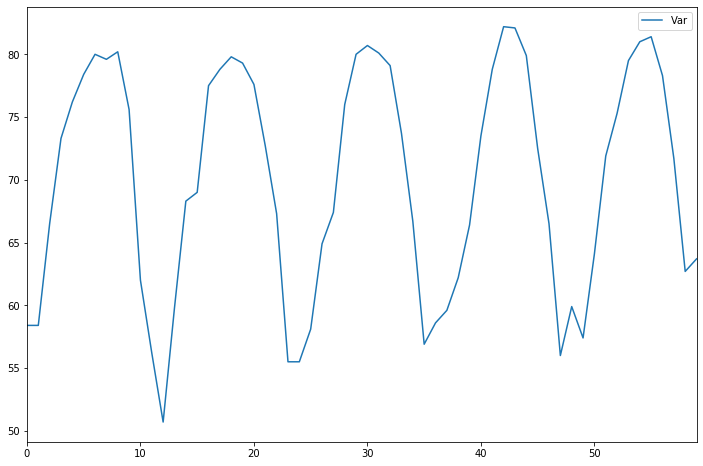

In [5]:
df[['Var']].plot(figsize=(12,8))

We can clearly see that the data follows a trend of going upward, reaching a certain peak and again going down (Dipping in values). This seasonal trend follows after every 12 observations.

#### Now we recall the ARIMA model from statsmodel, which we previously loaded.

In [6]:
model=sm.tsa.statespace.SARIMAX(df['Var'],order=(1, 0, 0),seasonal_order=(0,1,1,12))
results=model.fit()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


We Provide the column 'Var' to the model for training and testing purpose. Here there two paramters of the ARIMA model namely Order & Seasonal Order which we need to Discuss.

#### Order:
The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters. d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. Default is an AR(1) model: (1,0,0).
For this particular model we decided to go ahead with deafult AR(1) model.

#### Seasonal Order: 
The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. d must be an integer indicating the integration order of the process, while p and q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) or else iterables giving specific AR and / or MA lags to include. s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.
For this particular model we are taking value of 's' as 12, since there is a seasonal trend after every 12 observations. The P & D values are taken as 1 for reference. The Q value is taken as 1 for 1 individual observation.  

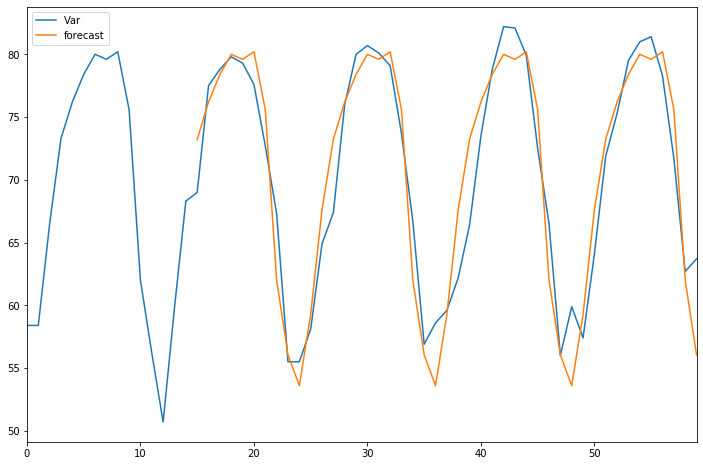

In [7]:
df['forecast']=results.predict(start=15,end=59,dynamic=True)
df[['Var','forecast']].plot(figsize=(12,8))

We now do a forecast (for training & testing purpose) using predictor function. We forecast the values from 15th observation to 59th (last) observation. We plot a graph of actual observations and forecasted values to see the difference. We can see the forecast line is pretty good and it is somewhat parsing through the actual line.

In [8]:
predicted=df['forecast'][15:]

We set a variable for predicted values as 'predicted'.

In [9]:
true=df['Var'][15:]

For the actual values we set the variable 'true'.

In [10]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(true,predicted)

2.3608647667072047

We calculate the performance of the model using Mean Absolute Error using Machine Learning package 'sklearn.metrics'.

In [11]:
future_dates=[df.index[-1]+i for i in range(0,5)]

We create a dataoffset and convert it to a dataframe.

In [12]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

We now showcase the future dataset that needs to be forecasted.

In [13]:
future_datest_df

,ID,Var,forecast
60,NaN,NaN,NaN
61,NaN,NaN,NaN
62,NaN,NaN,NaN
63,NaN,NaN,NaN


We now concatenate (link values together in a chain or series) the data with the previous dataset.

In [14]:
future_df=pd.concat([df,future_datest_df])

#### Now we forecast the values from the point that we want to the wnd value.
Note: We have forecasted the 58th and 59th value to link the forecasted line with actual data line in order to show the continuity.

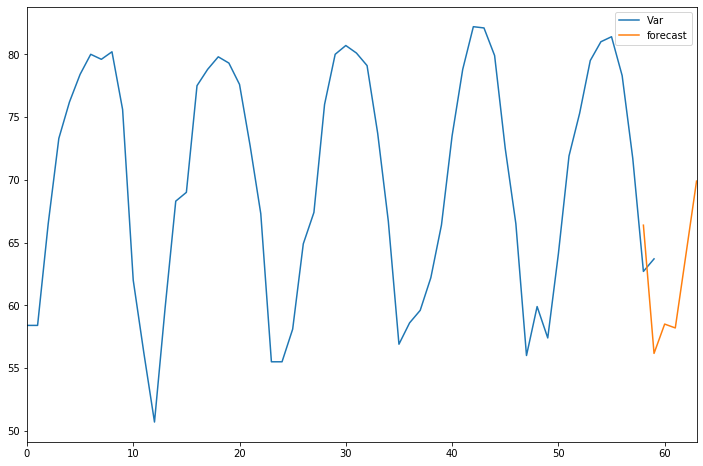

In [15]:
future_df['forecast'] = results.predict(start = 58, end = 63, dynamic= True)  
future_df[['Var', 'forecast']].plot(figsize=(12, 8))

In [16]:
future_df['forecast'][60:]

60    58.504228
61    58.196701
62    64.035552
63    69.898070
Name: forecast, dtype: float64